<div>
<img src=https://www.institutedata.com/wp-content/uploads/2019/10/iod_h_tp_primary_c.svg width="300">
</div>

# Lab 9.1: NN with Keras
INSTRUCTIONS:
- Read the guides and hints, then create the necessary analysis and code to find an answer and conclusion for the task below.
- **NOTE**: This is a Regression problem. Consider the appropriate:
    - Activation function
    - Loss/Cost Function
    - Metrics

### Import libraries

In [1]:
# insert code here

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [2]:
print("Keras version: ", keras.__version__)
print("tensorflow version: ", tf.__version__)

Keras version:  3.8.0
tensorflow version:  2.18.0


In [3]:
## Import libraries
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt

from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

# import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import Input

### Load data
Load the Diabetes dataset from **SciKit-Learn**.

In [4]:
# insert code here
# The diabetes dataset
diabetes = load_diabetes()

In [5]:
print(diabetes.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

:Number of Instances: 442

:Number of Attributes: First 10 columns are numeric predictive values

:Target: Column 11 is a quantitative measure of disease progression one year after baseline

:Attribute Information:
    - age     age in years
    - sex
    - bmi     body mass index
    - bp      average blood pressure
    - s1      tc, total serum cholesterol
    - s2      ldl, low-density lipoproteins
    - s3      hdl, high-density lipoproteins
    - s4      tch, total cholesterol / HDL
    - s5      ltg, possibly log of serum triglycerides level
    - s6      glu, blood sugar level

Note: Each of these 10 feature variables have bee

### Prepare input data

In [6]:
# insert code here
# input
X = diabetes.data

# print the type of X to check that it is a numpy array
print("X is a ", type(X))

# print shape to check rows and columns
print("X has {} rows and {} columns".format(X.shape[0], X.shape[1]))

# save number of columns as n_cols
n_cols = X.shape[1]

# output
y = diabetes.target

print("First 10 values in y: ", y[:10])

X is a  <class 'numpy.ndarray'>
X has 442 rows and 10 columns
First 10 values in y:  [151.  75. 141. 206. 135.  97. 138.  63. 110. 310.]


In [7]:
# How many observations are in y?
len(y)

442

In [8]:
y.shape

(442,)

### Split the data (training/test)

In [9]:
# insert code here
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size = 0.3,
    random_state = 65)

### Create the model's architecture

In [10]:
# insert code here
# set up the model architecture
model = Sequential()

In [11]:
model.add(Input(shape=(n_cols,)))
# Add the first hidden layer
model.add(Dense(15, activation='relu'))
# Add the second hidden layer
model.add(Dense(5, activation='relu'))
# Add the output layer
model.add(Dense(1, activation='linear'))

In [12]:
print(model.summary())

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 15)             │           165 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 5)              │            80 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │             6 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 251 (1004.00 B)

 Trainable params: 251 (1004.00 B)

 Non-trainable params: 0 (0.00 B)

None


### Compile the model

In [13]:
# insert code here
# Compile the model
model.compile(
    optimizer='adam',
    loss='mse',
    metrics=['mse'])

### Fit the training data

In [14]:
# shuffle training data
from sklearn.utils import shuffle
X_train2, y_train2 = shuffle(X_train, y_train, random_state=42)

In [15]:
%%time
# insert code here
# Fit the model
history = model.fit(
    X_train2,
    y_train2,
    validation_split=0.25,
    batch_size=10,
    epochs=1000,
    verbose=1)


Epoch 1/1000
24/24 ━━━━━━━━━━━━━━━━━━━━ 4s 22ms/step - loss: 28412.5957 - mse: 28412.5957 - val_loss: 28074.1602 - val_mse: 28074.1602
Epoch 2/1000
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 29748.8711 - mse: 29748.8711 - val_loss: 28033.6992 - val_mse: 28033.6992
Epoch 3/1000
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 29074.1133 - mse: 29074.1133 - val_loss: 27981.3398 - val_mse: 27981.3398
Epoch 4/1000
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 26994.0156 - mse: 26994.0156 - val_loss: 27912.2754 - val_mse: 27912.2754
Epoch 5/1000
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 27928.1504 - mse: 27928.1504 - val_loss: 27824.5039 - val_mse: 27824.5039
Epoch 6/1000
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 28708.0898 - mse: 28708.0898 - val_loss: 27714.2891 - val_mse: 27714.2891
Epoch 7/1000
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 26845.5098 - mse: 26845.5098 - val_loss: 27579.8848 - val_mse: 27579.8848
Epoch 8/1000
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 2

### Create predictions

In [16]:
# insert code here
predictions = model.predict(X_test)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


In [17]:
predictions

array([[178.21329 ],
       [191.49205 ],
       [174.51846 ],
       [232.97908 ],
       [194.87479 ],
       [264.49915 ],
       [154.60107 ],
       [ 67.446724],
       [151.68217 ],
       [172.07869 ],
       [216.41216 ],
       [195.58116 ],
       [ 94.57124 ],
       [228.63596 ],
       [ 89.5868  ],
       [226.76605 ],
       [ 86.198395],
       [123.6141  ],
       [135.26479 ],
       [160.59753 ],
       [ 82.93951 ],
       [ 79.81977 ],
       [196.7336  ],
       [120.54289 ],
       [236.27023 ],
       [189.53539 ],
       [124.83225 ],
       [ 95.81052 ],
       [185.747   ],
       [231.07848 ],
       [224.95374 ],
       [225.7084  ],
       [166.86523 ],
       [117.89495 ],
       [128.93599 ],
       [159.6056  ],
       [107.396996],
       [235.41794 ],
       [211.83228 ],
       [128.1173  ],
       [ 96.77852 ],
       [123.341385],
       [185.64555 ],
       [232.60721 ],
       [140.21034 ],
       [269.96918 ],
       [152.94173 ],
       [203.5

### Evaluate the model

In [18]:
# insert code here
# Calculate test MSE
score = model.evaluate(X_test, y_test)
print('\nTest loss: %.6f' % score[0])

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 3412.4792 - mse: 3412.4792 

Test loss: 3320.603760


In [19]:
score

[3320.603759765625, 3320.603759765625]

In [20]:
# Find RMSE
score[0] ** (1/2)

57.62468012723043

In [21]:
y.mean()

np.float64(152.13348416289594)

In [22]:
y.std()

np.float64(77.00574586945044)

In [23]:
y.min()

np.float64(25.0)

In [24]:
y.max()

np.float64(346.0)

### Visualisation of cost

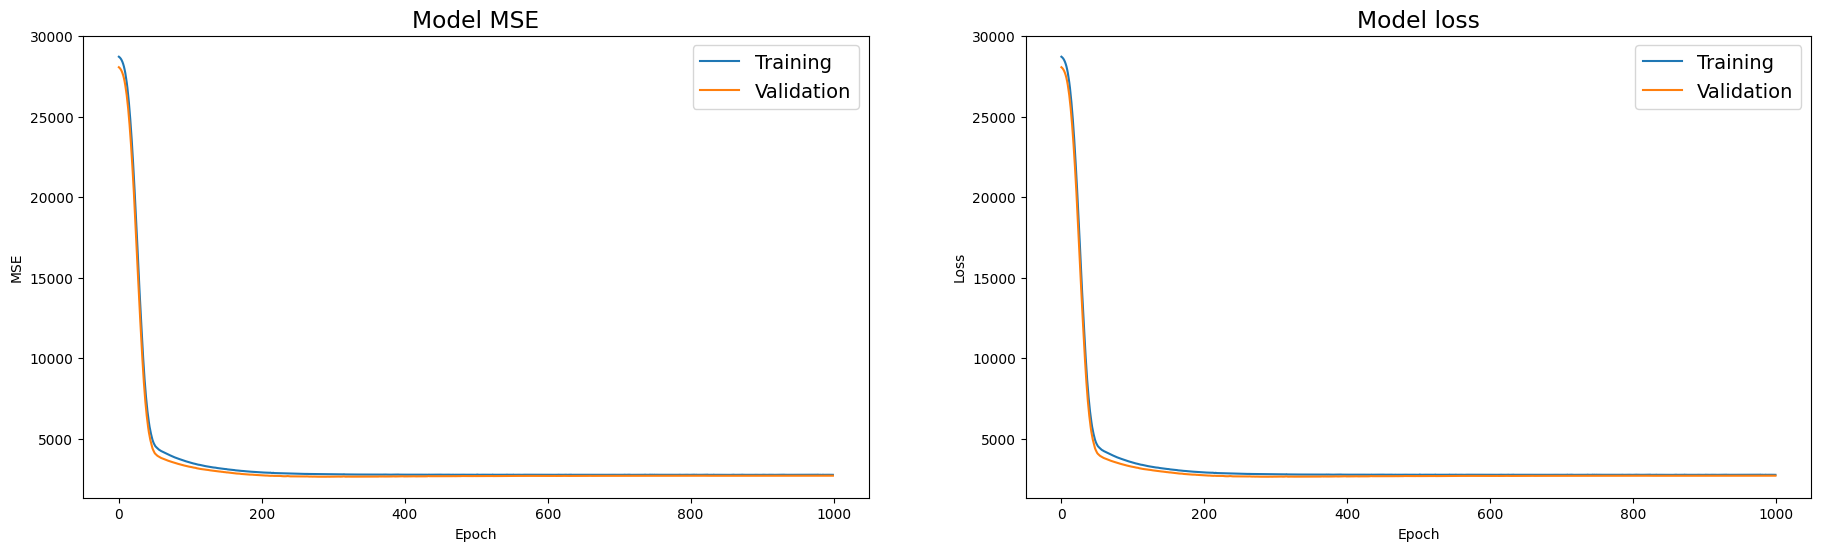

In [25]:
# insert code here
fig, ax = plt.subplots(1, 2, figsize = (18, 6))
fig.subplots_adjust(left = 0.02, right = 0.98, wspace = 0.2)

plt.rcParams.update({'font.size': 14})

# Plot training & validation accuracy values
ax[0].plot(history.history['mse'], label = 'Training')
ax[0].plot(history.history['val_mse'], label = 'Validation')
ax[0].set_title('Model MSE')
ax[0].set_ylabel('MSE')
ax[0].set_xlabel('Epoch')
ax[0].legend()

# Plot training & validation loss values
ax[1].plot(history.history['loss'], label = 'Training')
ax[1].plot(history.history['val_loss'], label = 'Validation')
ax[1].set_title('Model loss')
ax[1].set_ylabel('Loss')
ax[1].set_xlabel('Epoch')
ax[1].legend()

plt.show()

### Visualisation of residuals

In [26]:
# insert code here
# Calculate R2 and adjusted R2
r2 = r2_score(y_test, predictions)
n, p = X.shape # sample size, number of explanatory variables
adjusted_r2 = 1- (1 - r2) * ((n-1) / (n - p - 1))

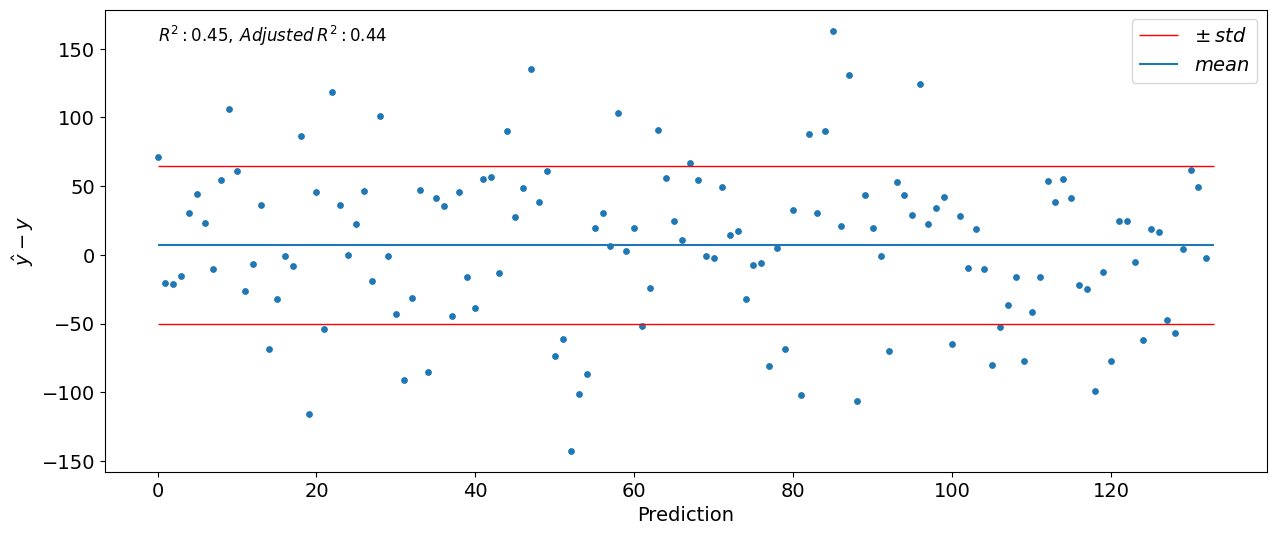

In [27]:
difference = predictions.flatten() - y_test
d_mean = difference.mean()
d_std = difference.std()
n_pred = len(predictions)
plt.figure(figsize = (15, 6))
plt.scatter(range(n_pred), difference, s = 15)
plt.hlines(d_mean + d_std, 0, n_pred, 'r', lw = 1, label = '$\pm \: std$')
plt.hlines(d_mean, 0, n_pred, label = '$mean$')
plt.hlines(d_mean - d_std, 0, n_pred, 'r', lw = 1)
plt.xlabel('Prediction')
plt.ylabel('$\hat y - y$')
plt.legend()
plt.text(0, difference.max() * 0.95,
         '$R^2: %.2f, \: Adjusted \: R^2: %.2f$' % (r2, adjusted_r2),
         fontsize = 12)
plt.show()



---



---



> > > > > > > > > © 2025 Institute of Data


---



---



